In [52]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')


In [53]:
df = pd.read_csv('master.csv')

In [54]:
#check rows/columns
df.shape

(27820, 12)

In [55]:
df.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
11826,Iceland,1997,female,25-34 years,1,20279,4.93,Iceland1997,NaN,"7,548,912,105",30326,Generation X
25668,Turkey,2011,female,35-54 years,82,9296163,0.88,Turkey2011,0.751,"832,523,681,194",12237,Generation X
10279,Greece,2006,female,75+ years,9,503415,1.79,Greece2006,NaN,"273,317,737,047",25739,Silent
7694,Ecuador,1985,male,75+ years,8,40000,20.00,Ecuador1985,0.631,"17,149,094,590",2238,G.I. Generation
20760,Romania,2002,male,55-74 years,651,1878420,34.66,Romania2002,NaN,"46,174,557,556",2231,Silent
21005,Russian Federation,1994,female,15-24 years,915,10036800,9.12,Russian Federation1994,NaN,"395,077,301,248",2853,Generation X
2179,Azerbaijan,1990,female,5-14 years,0,713400,0.00,Azerbaijan1990,NaN,"8,858,006,036",1439,Generation X
26043,Turkmenistan,2013,male,5-14 years,0,498604,0.00,Turkmenistan2013,0.682,"39,197,543,860",8255,Generation Z
23193,Slovenia,2008,male,55-74 years,96,206257,46.54,Slovenia2008,NaN,"55,589,849,128",28599,Silent
17790,New Zealand,2013,female,35-54 years,63,635060,9.92,New Zealand2013,0.911,"190,785,204,764",46198,Generation X


In [56]:
df.columns

Index([u'country', u'year', u'sex', u'age', u'suicides_no', u'population',
       u'suicides/100k pop', u'country-year', u'HDI for year',
       u' gdp_for_year ($) ', u'gdp_per_capita ($)', u'generation'],
      dtype='object')

In [57]:
#make columns look nicer
df=df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age'
                     ,'suicides_no':'SuicidesNo','population':'Population',
                      'suicides/100k pop':'Suicides/100kPop','country-year':'Country/Year',
                      'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear($)',
                      'gdp_per_capita ($)':'GdpPerCapital($)','generation':'Generation'})

In [58]:
#checking for null values
df.isnull().any()

Country             False
Year                False
Gender              False
Age                 False
SuicidesNo          False
Population          False
Suicides/100kPop    False
Country/Year        False
HDIForYear           True
GdpForYear($)       False
GdpPerCapital($)    False
Generation          False
dtype: bool

In [59]:
#count amount of null values
df.isnull().sum()

Country                 0
Year                    0
Gender                  0
Age                     0
SuicidesNo              0
Population              0
Suicides/100kPop        0
Country/Year            0
HDIForYear          19456
GdpForYear($)           0
GdpPerCapital($)        0
Generation              0
dtype: int64

In [60]:
df.drop('HDIForYear', axis=1, inplace = True)

In [61]:
df.drop('Country/Year', axis=1, inplace=True)

In [62]:
df = df[df.Year >= 2000]

In [63]:
df = df[df.Gender =='male']

In [64]:
criteria_1 = df['Age'] == '15-24 years'
criteria_2 = df['Age'] == '25-34 years'
criteria_all = criteria_1 | criteria_2
df= df[criteria_all]

In [65]:
#here we have dropped unneeded columns, as well as filtered the data

In [66]:
df.shape

(2700, 10)

In [67]:
#create new data frame grouped by year to check
yearlyStats = df.groupby('Year').sum()
yearlyStats

,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,,,,
2000,59644,303826439,3229.92,2144246
2001,58247,294418020,3180.76,2112982
2002,59142,306099407,3148.50,2169570
2003,57793,307709511,2923.48,2531184
2004,54237,288503356,2753.26,2982656
2005,52261,286441850,2640.07,3386202
2006,52462,304627019,2622.88,3593964
2007,52476,306860026,2742.68,4118270
2008,52351,304601340,2625.93,4489368


In [68]:
#Checkking countries for bad values
countryStats = df.groupby('Country').sum()
countryStats

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Country,,,,,
Albania,44110,224,5131246,99.48,64670
Antigua and Barbuda,56198,0,194535,0.00,366804
Argentina,64240,17714,103440429,544.11,296698
Armenia,60254,176,7572411,72.92,84492
Aruba,48132,17,148132,273.39,600254
Australia,60230,9307,45808818,612.38,1394682
Austria,68272,3163,18347564,583.90,1488250
Azerbaijan,24034,199,8562700,28.76,17064
Bahamas,56182,20,793504,70.71,873978


In [69]:
#dropping countries with bad data
country_1 = df['Country'] != 'Antigua'
country_2 = df['Country'] != 'Barbados'
country_3 = df['Country'] != 'Grenada'
country_4 = df['Country'] != 'Maldives'
country_5 = df['Country'] != 'Montenegro'
country_6 = df['Country'] != 'Saint Vincent'

country_all = country_1 | country_2 | country_3 | country_4 | country_5 | country_6
df= df[country_all]

In [70]:
#removing 2016 due to being incomplete
df = df[df.Year != 2016]

In [71]:
df.shape

(2668, 10)

In [72]:
df.Country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Saint Lucia

In [73]:
#create lists of countries per continent
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']
                 

In [74]:
#move these to a dictionary of continents
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

In [75]:
#map continents to countries
df['Continent'] = df['Country'].map(continents)

In [76]:
df.shape

(2668, 11)

In [77]:
data_per_year = df.groupby('Year').sum()
data_per_year['SuicidesNo']

Year
2000    59644
2001    58247
2002    59142
2003    57793
2004    54237
2005    52261
2006    52462
2007    52476
2008    52351
2009    53909
2010    52474
2011    51968
2012    49885
2013    46932
2014    47086
2015    42665
Name: SuicidesNo, dtype: int64

In [78]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.close()

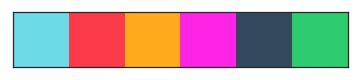

In [79]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

Text(0.5,0,'Year')

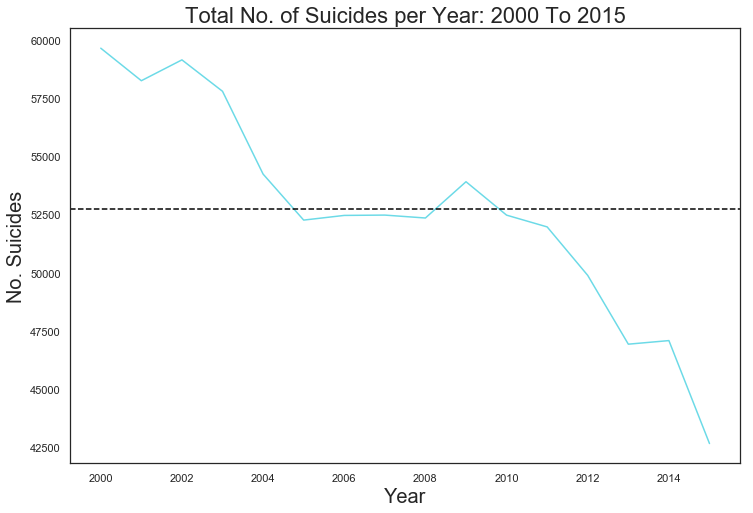

In [80]:
#Total suicides, with average line
data_per_year['SuicidesNo'].plot()
plt.title('Total No. of Suicides per Year: 2000 To 2015', fontsize = 22)
plt.axhline(y=52720, color='black', linestyle='--')
plt.ylabel('No. Suicides', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

In [81]:
#group data by continent
data_per_continent = df.groupby('Continent').mean()
data_per_continent

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Continent,,,,,
Africa,2007.729167,37.562500,1.598804e+06,10.798958,8369.833333
Asia,2007.430380,330.966245,2.093260e+06,13.426181,20760.978903
Australia_Oceania,2006.547619,138.380952,6.604436e+05,18.140238,27726.380952
Europe,2007.324232,327.981229,1.344674e+06,18.502406,28637.912969
North_America,2007.281853,362.418919,2.305799e+06,10.011178,14040.142857
South_America,2007.049383,306.472222,2.727425e+06,20.736512,8610.216049


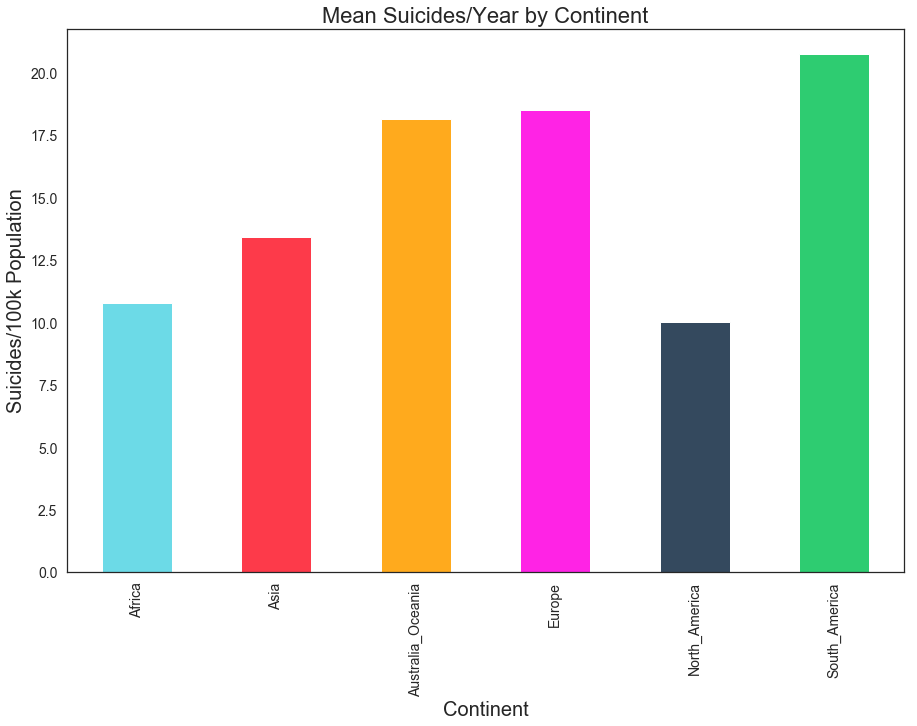

In [82]:
#plot mean suicides/year by continent
ax = data_per_continent['Suicides/100kPop'].plot(kind='bar', figsize=(15, 10), fontsize=14)
plt.title('Mean Suicides/Year by Continent', fontsize = 22)
ax.set_xlabel("Continent", fontsize=20)
ax.set_ylabel("Suicides/100k Population", fontsize=20)
plt.show()

In [83]:
dftesting = df[['Continent','Year','Suicides/100kPop']]
dftesting

,Continent,Year,Suicides/100kPop
132,Europe,2000,7.33
137,Europe,2000,2.08
144,Europe,2001,10.65
148,Europe,2001,3.91
157,Europe,2002,11.15
160,Europe,2002,5.70
171,Europe,2003,5.49
174,Europe,2003,4.38
182,Europe,2004,7.85
184,Europe,2004,6.63


In [84]:
dfAgg = dftesting.groupby(['Continent','Year'],sort=True,as_index=False)['Suicides/100kPop'].mean()

<function matplotlib.pyplot.show>

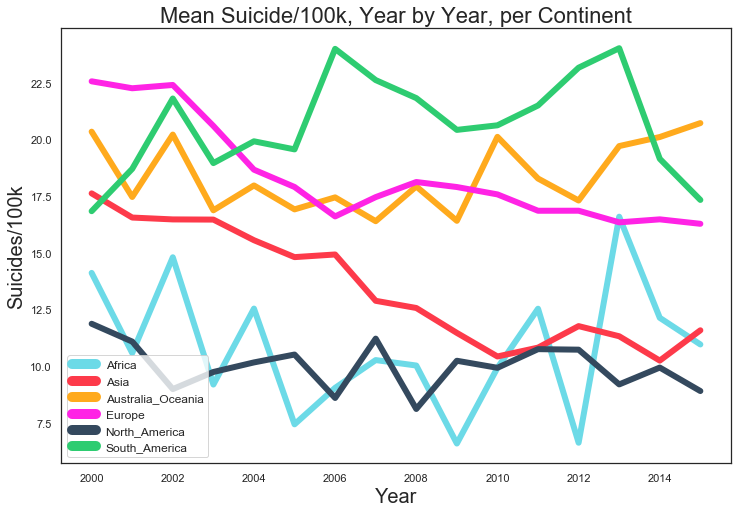

In [85]:
#plotting mean suicide/100k by continent, year by year
by_cont = dfAgg.groupby('Continent')

for name, group in by_cont:
    plt.plot(group['Year'], group['Suicides/100kPop'], label=name, linewidth=6.0)
    

plt.title('Mean Suicide/100k, Year by Year, per Continent', fontsize = 22)
plt.ylabel('Suicides/100k', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
leg = plt.legend(fontsize = 12)
for line in leg.get_lines():
    line.set_linewidth(10)
plt.show

Text(0.5,0,'Country')

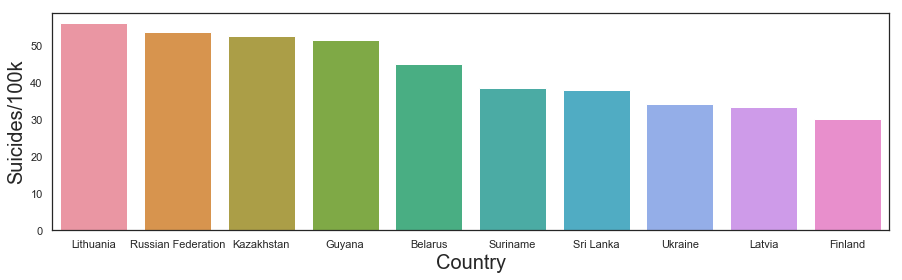

In [86]:
#plotting countries with the highest suicide rate
data_suicide_mean = df['Suicides/100kPop'].groupby(df.Country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10))
plt.ylabel('Suicides/100k', fontsize = 20)
plt.xlabel('Country', fontsize = 20)

In [ ]:
#creating sub frame for UK only (Unused in final report)
dfUK = df[df.Country == 'United Kingdom']
uk_by_year = dfUK.groupby('Year').sum()


In [ ]:
dfUK.corr(method ='pearson')

In [ ]:
sns.heatmap(dfUK.corr(method = 'pearson'),cmap='YlGnBu',annot=True)

In [ ]:
uk_by_year['Suicides/100kPop'].plot()
plt.title('UK Suicides Rate', fontsize = 22)
plt.ylabel('Suicides/100k Population', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

In [ ]:
uk_by_year['GdpPerCapital($)'].plot()
plt.title('GDP/Capita', fontsize = 22)
plt.ylabel('GdpPerCapital($)', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

In [88]:
#new data frame with only data from 2015
df2015 = df[df.Year == 2015]

In [89]:
df2015 = df2015[['Country','Suicides/100kPop','GdpPerCapital($)', 'Continent']]

In [90]:
df2015

,Country,Suicides/100kPop,GdpPerCapital($),Continent
582,Antigua and Barbuda,0.00,14853,North_America
583,Antigua and Barbuda,0.00,14853,North_America
949,Argentina,18.74,14981,South_America
951,Argentina,14.13,14981,South_America
1240,Armenia,3.91,3775,Asia
1244,Armenia,0.92,3775,Asia
1776,Australia,24.00,60656,Australia_Oceania
1778,Australia,17.46,60656,Australia_Oceania
2150,Austria,13.20,46484,Europe
2151,Austria,11.74,46484,Europe


In [91]:
df2015check = df2015.groupby('Country').sum()

In [92]:
df2015check['GdpPerCapital($)'] = df2015check['GdpPerCapital($)'].div(2)

In [93]:
df2015check.reset_index(level=0, inplace=True)
df2015check

,Country,Suicides/100kPop,GdpPerCapital($)
0,Antigua and Barbuda,0.00,14853.0
1,Argentina,32.87,14981.0
2,Armenia,4.83,3775.0
3,Australia,41.46,60656.0
4,Austria,24.94,46484.0
5,Belgium,35.93,42830.0
6,Belize,36.49,5561.0
7,Brazil,18.67,9431.0
8,Chile,37.03,14729.0
9,Colombia,20.76,6552.0


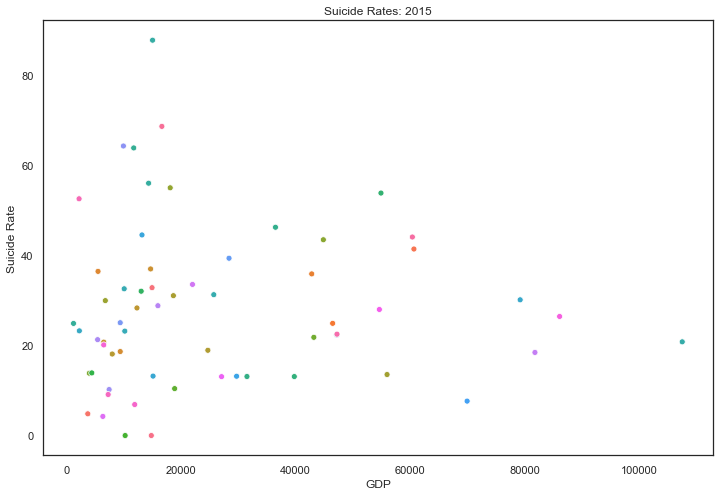

In [95]:
sns.scatterplot(x='GdpPerCapital($)', y='Suicides/100kPop', data=df2015check, hue='Country',legend=False) 
plt.title('Suicide Rates: 2015')
plt.ylabel('Suicide Rate')
plt.xlabel('GDP')
plt.show()
# Checking data for rates

In [ ]:
df2015.shape

In [96]:
dfcont = df2015.groupby(['Continent','Country'],sort=True,as_index=False)['Suicides/100kPop','GdpPerCapital($)'].sum()

In [97]:
dfcont['GdpPerCapital($)'] = dfcont['GdpPerCapital($)'].div(2)
dfcont.reset_index(level=0, inplace=True)

In [98]:
dfcont

,index,Continent,Country,Suicides/100kPop,GdpPerCapital($)
0,0,Africa,Mauritius,32.62,10125.0
1,1,Africa,Seychelles,28.86,16005.0
2,2,Africa,South Africa,4.25,6403.0
3,3,Asia,Armenia,4.83,3775.0
4,4,Asia,Israel,13.11,39793.0
5,5,Asia,Japan,46.30,36510.0
6,6,Asia,Kazakhstan,63.93,11784.0
7,7,Asia,Kyrgyzstan,24.92,1285.0
8,8,Asia,Qatar,7.65,69937.0
9,9,Asia,Republic of Korea,39.41,28410.0


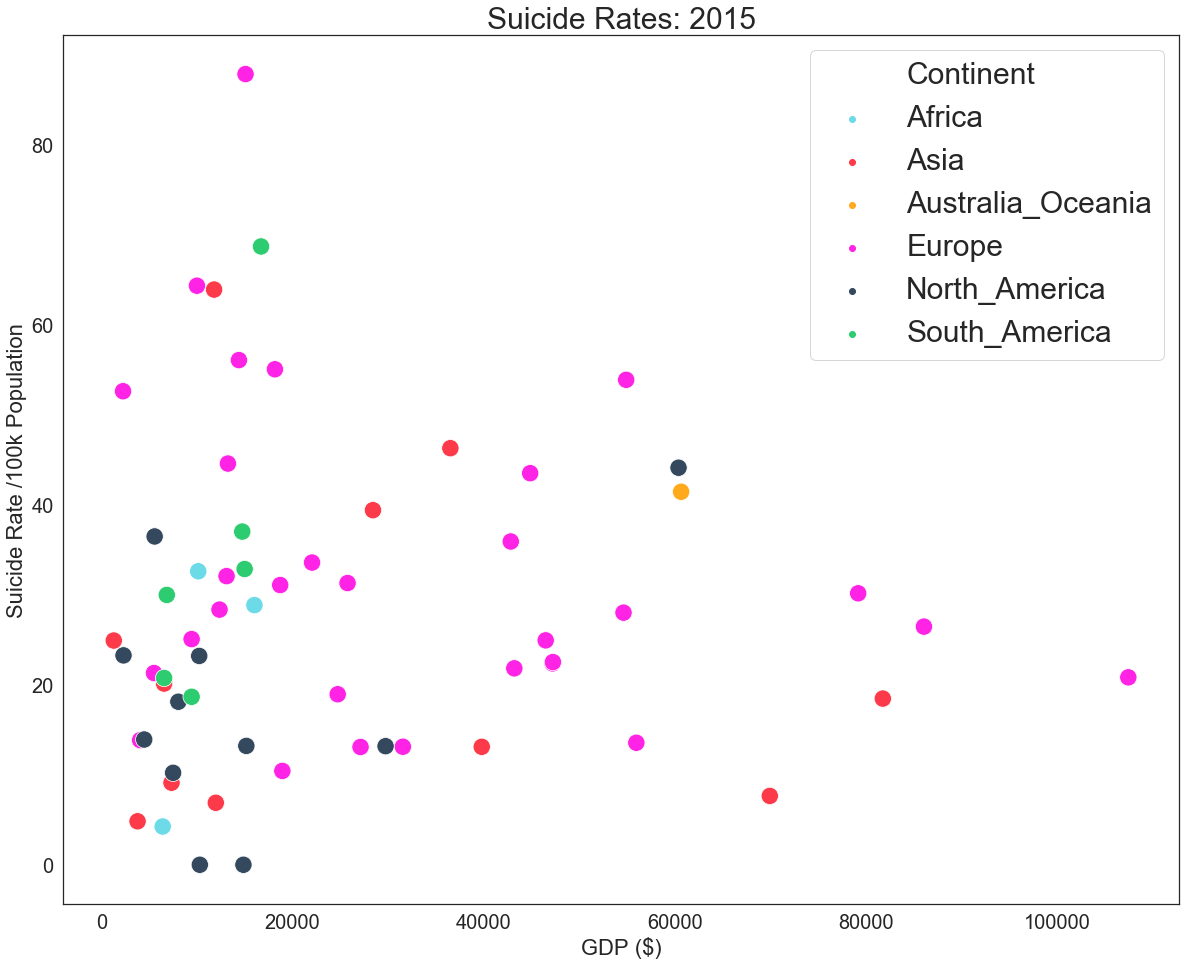

In [99]:
#plot suicide rate vs gdp
plt.figure(figsize=(20,16))
sns.scatterplot(x='GdpPerCapital($)',s=300, y='Suicides/100kPop',data=dfcont, hue='Continent') 
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP ($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})


plt.show()

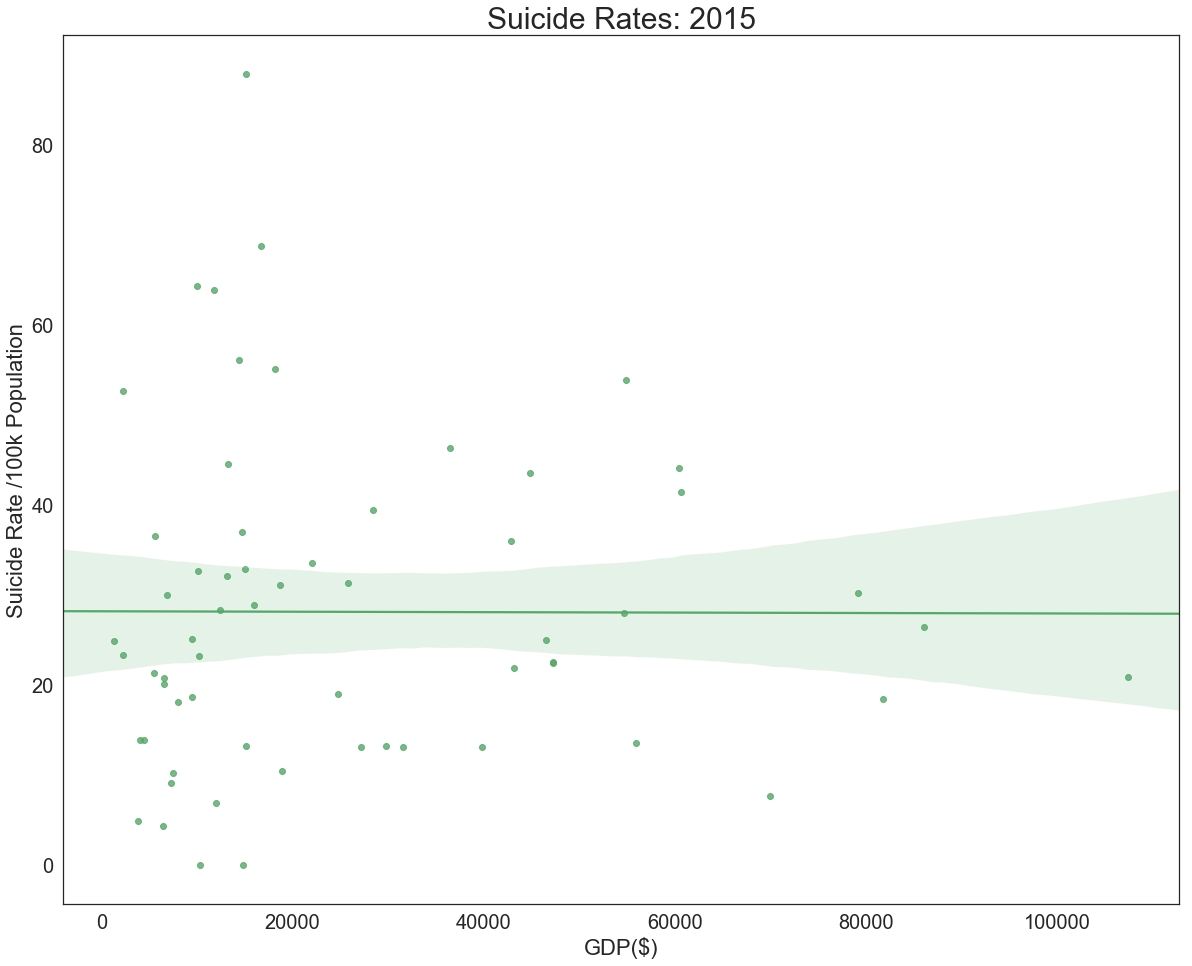

In [100]:
#regression plot for suicide rates vs gdp
plt.figure(figsize=(20,16))
sns.regplot(x="GdpPerCapital($)", y="Suicides/100kPop", data=dfcont, color = 'g')
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [101]:
dfcont.to_csv('Desktop/CheckHappy.csv')

IOError: [Errno 2] No such file or directory: 'Desktop/CheckHappy.csv'

In [102]:
#take happiness score from 2015 report, move to list
happyIndex = ['5.648','0.000','4.459','4.360','7.267','5.921','5.919','5.185','6.375','0.000','6.739','6.474','5.389','5.658','7.313','7.119','6.929','5.488','5.546','6.596','7.526','5.517','7.413','4.254','6.994','5.033','5.145','7.501','5.977','5.560','5.813','6.871','6.488','7.339','7.498','5.835','5.528','5.856','5.177','5.768','6.361','7.291','7.509','4.324','6.725','0.000','5.956','0.000','0.000','6.324','6.778','5.992','6.701','7.039','0.000','7.104','6.650','6.952','6.705','6.481','5.976','6.545']

In [103]:
#map list contents to new column
dfcont['HappinessScore'] = happyIndex

In [104]:
dfcont

,index,Continent,Country,Suicides/100kPop,GdpPerCapital($),HappinessScore
0,0,Africa,Mauritius,32.62,10125.0,5.648
1,1,Africa,Seychelles,28.86,16005.0,0.000
2,2,Africa,South Africa,4.25,6403.0,4.459
3,3,Asia,Armenia,4.83,3775.0,4.360
4,4,Asia,Israel,13.11,39793.0,7.267
5,5,Asia,Japan,46.30,36510.0,5.921
6,6,Asia,Kazakhstan,63.93,11784.0,5.919
7,7,Asia,Kyrgyzstan,24.92,1285.0,5.185
8,8,Asia,Qatar,7.65,69937.0,6.375
9,9,Asia,Republic of Korea,39.41,28410.0,0.000


In [105]:
#remove 0 values
dfcont = dfcont[dfcont.HappinessScore != '0.000']

In [106]:
dfcont

,index,Continent,Country,Suicides/100kPop,GdpPerCapital($),HappinessScore
0,0,Africa,Mauritius,32.62,10125.0,5.648
2,2,Africa,South Africa,4.25,6403.0,4.459
3,3,Asia,Armenia,4.83,3775.0,4.360
4,4,Asia,Israel,13.11,39793.0,7.267
5,5,Asia,Japan,46.30,36510.0,5.921
6,6,Asia,Kazakhstan,63.93,11784.0,5.919
7,7,Asia,Kyrgyzstan,24.92,1285.0,5.185
8,8,Asia,Qatar,7.65,69937.0,6.375
10,10,Asia,Singapore,18.47,81766.0,6.739
11,11,Asia,Thailand,20.14,6552.0,6.474


In [107]:
dfcont.sort_values('HappinessScore', inplace = True)

In [108]:
dfcont.HappinessScore = dfcont.HappinessScore.astype(float)
dfcont = dfcont[dfcont.HappinessScore >= 5.5]

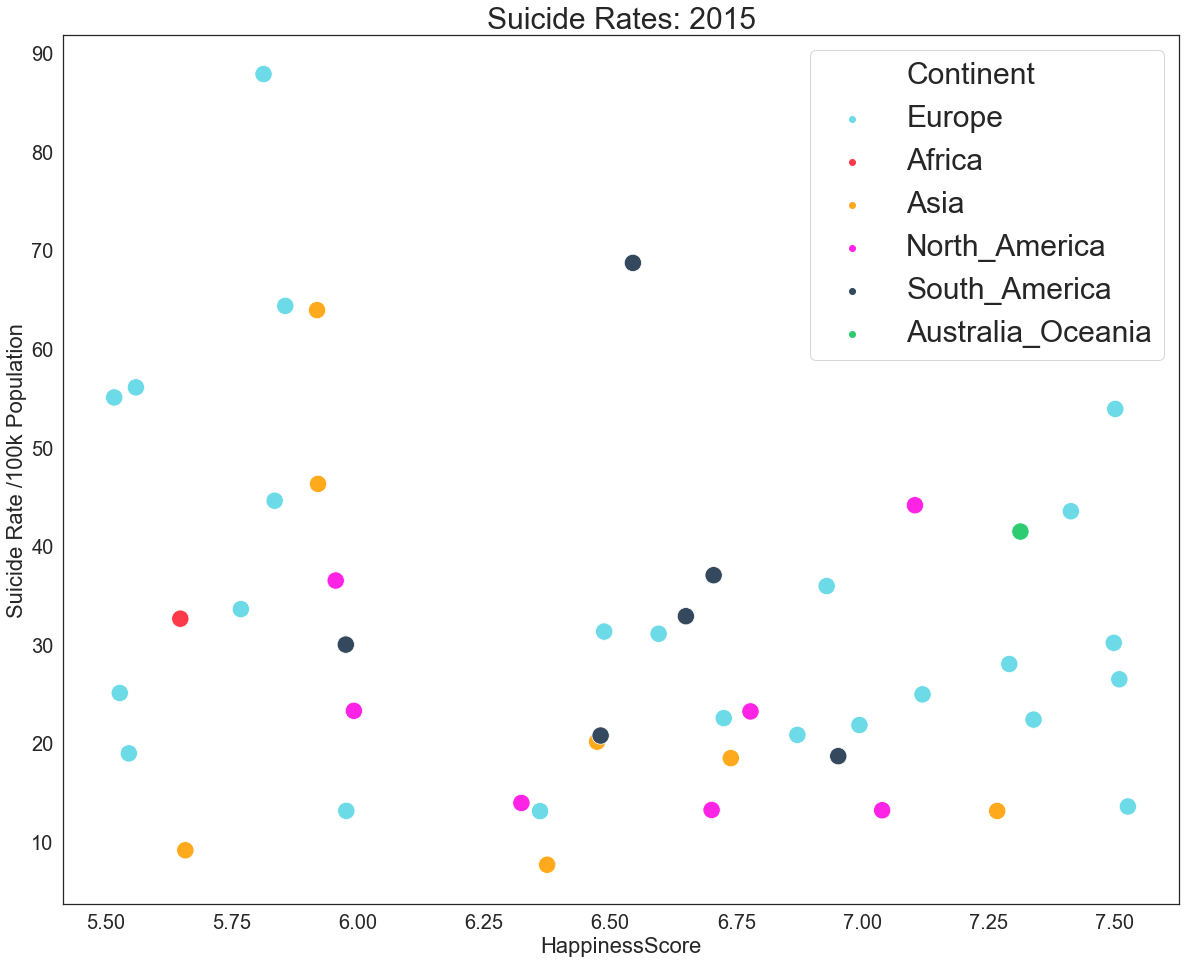

In [109]:
#plot suicide rates vs happiness score
plt.figure(figsize=(20,16))
sns.scatterplot(x='HappinessScore',s=300, y='Suicides/100kPop',data=dfcont, hue='Continent') 
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('HappinessScore', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})

plt.show()

In [ ]:
#regression plot, suicide rates vs happiness score
plt.figure(figsize=(20,16))
sns.regplot(x="HappinessScore", y="Suicides/100kPop", data=dfcont, color = 'g')
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('HappinessScore', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [110]:
#show correlation between features
dfcont.corr(method = 'pearson')

,index,Suicides/100kPop,GdpPerCapital($),HappinessScore
index,1.000000,-0.003283,-0.262096,0.087523
Suicides/100kPop,-0.003283,1.000000,-0.175131,-0.239527
GdpPerCapital($),-0.262096,-0.175131,1.000000,0.637083
HappinessScore,0.087523,-0.239527,0.637083,1.000000


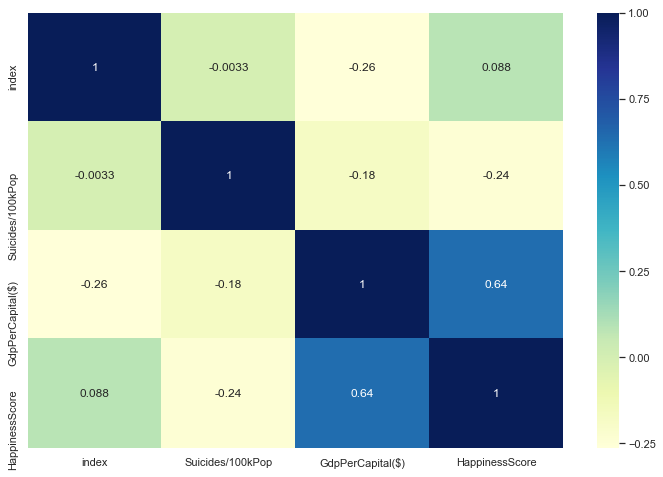

In [111]:
#plot correlation to heatmap
sns.heatmap(dfcont.corr(method = 'pearson'),cmap='YlGnBu',annot=True)

In [ ]:
Y = dfcont[['Suicides/100kPop']]

X = dfcont[['HappinessScore']]

In [ ]:
#import machine learning modules
import pylab as pl

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [ ]:
#plotting elbow curve for ideal number of clusters
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [ ]:
f1 = dfcont['HappinessScore'].values
f2 = dfcont['GdpPerCapital($)'].values
X = np.array(list(zip(f1, f2)))

In [ ]:
from sklearn import preprocessing

In [ ]:
dfcontpre =  dfcont.drop('Country', axis=1)

In [ ]:
dfcontpre = dfcontpre.drop('Continent', axis=1)

In [ ]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(dfcontpre)

In [ ]:
dfscaled = pd.DataFrame(minmax_processed, index=dfcontpre.index, columns=dfcontpre.columns)

In [ ]:
#here we have scaled the data using minmax processing

In [ ]:
dfscaled.sample(5)

In [ ]:
#1d numpy arrays zipped to 2d
f1 = dfscaled['Suicides/100kPop'].values
f2 = dfscaled['GdpPerCapital($)'].values
X = np.array(list(zip(f1, f2)))
print X[0:5]

In [ ]:
#k-means plot suicide rate vs gdp, 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0)                   
kmeans.fit(X) 
plt.figure(figsize=(20,16))
plt.scatter(X[:, 0], X[:, 1],c = kmeans.labels_,cmap='viridis', s = 300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')

In [ ]:
print kmeans.labels_

In [ ]:
dfcont.to_csv('Desktop/Checkgini.csv')

In [ ]:
#get gini index scores and move to list
giniIndex = ['34.8','27.3','34.8','34.5','37.0','40.8','24.4','37.9','30.8','41.2','26.3','37.9','53.3','45.9','31.9','47.1','53.0','35.9','41.1','44.5','51.1','28.1','41.6','25.0','41.7','50.7','50.5','32.4','45.9','48.2','30.4','25.9','49.0','27.0','45.0','45.0','30.5','42.8','24.9','30.3','30.3','27.2','26.8','28.0','29.5','29.0']

In [ ]:
#read list into new column
dfcont['GiniIndex']= giniIndex

In [ ]:
dfcont.head(5)

In [ ]:
dfcontpre =  dfcont.drop('Country', axis=1)

In [ ]:
dfcontpre =  dfcontpre.drop('Continent', axis=1)

In [ ]:
dfcontpre.GiniIndex = dfcontpre.GiniIndex.astype(float)

In [ ]:
#reprocessing data with gini index included
minmax_processed = preprocessing.MinMaxScaler().fit_transform(dfcontpre)

In [ ]:
dfscaled = pd.DataFrame(minmax_processed, index=dfcontpre.index, columns=dfcontpre.columns)

In [ ]:
dfscaled.head(5)

In [ ]:
dfscaled.corr()

In [ ]:
#1d numpy arrays zipped to 2d
f1 = dfscaled['Suicides/100kPop'].values
f2 = dfscaled['GiniIndex'].values
X = np.array(list(zip(f1, f2)))

In [ ]:
#plot k-means  suicide rate vs gini index
kmeans = KMeans(n_clusters = 3, random_state = 0)                   
kmeans.fit(X) 
plt.figure(figsize=(20,16))
plt.scatter(X[:, 0], X[:, 1],c = kmeans.labels_,cmap='viridis', s = 300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')

In [ ]:
#1d numpy arrays zipped to 2d
f1 = dfscaled['Suicides/100kPop'].values
f2 = dfscaled['HappinessScore'].values
X = np.array(list(zip(f1, f2)))

In [ ]:
#k-means suicide rate vs happiness score
kmeans = KMeans(n_clusters = 3, random_state = 0)                   
kmeans.fit(X) 
plt.figure(figsize=(20,16))
plt.scatter(X[:, 0], X[:, 1],c = kmeans.labels_,cmap='viridis', s = 300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')

In [ ]:
#1d numpy arrays zipped to 2d
f1 = dfscaled['GdpPerCapital($)'].values
f2 = dfscaled['HappinessScore'].values
X = np.array(list(zip(f1, f2)))

In [ ]:
#k-means gdp vs happiness score (unused in report)
kmeans = KMeans(n_clusters = 3, random_state = 0)                   
kmeans.fit(X) 
plt.figure(figsize=(20,16))
plt.scatter(X[:, 0], X[:, 1],c = kmeans.labels_,cmap='viridis', s = 300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')

In [ ]:
#import modules for permutation importance, and show output
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestRegressor

dfrfr = dfscaled.drop("index", axis = 1)
rfr = RandomForestRegressor(random_state=42)

y = dfrfr[['Suicides/100kPop']].values
X = dfrfr.drop('Suicides/100kPop',axis=1).values

perm = PermutationImportance(rfr.fit(X,y), random_state=42).fit(X, y)
eli5.show_weights(perm, feature_names = dfrfr.drop('Suicides/100kPop',axis=1).columns.tolist())